In [1]:
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix

In [29]:
import json
from pprint import pprint

tmp_list = []
# with open('/Users/danielkershaw/PycharmProjects/DiffusionSimulation/output/lr-test/part-00000') as data_file:
with open('/Users/danielkershaw/Downloads/regression-download/reddit-comment') as data_file:
# with open('/Users/danielkershaw/Downloads/lr-twitter-geo-mean-2') as data_file:
    for l in data_file:
        data = json.loads(l)
        tmp_list.append(data)
df = pd.DataFrame(tmp_list)


In [30]:
dft = df.drop('result_mean', 1).set_index(['target','combination','observation_level']).unstack()
dft.columns = dft.columns.droplevel()

dft_error = df.drop('result_var', 1).set_index(['target','combination','observation_level']).unstack()
dft_error.columns = dft_error.columns.droplevel()



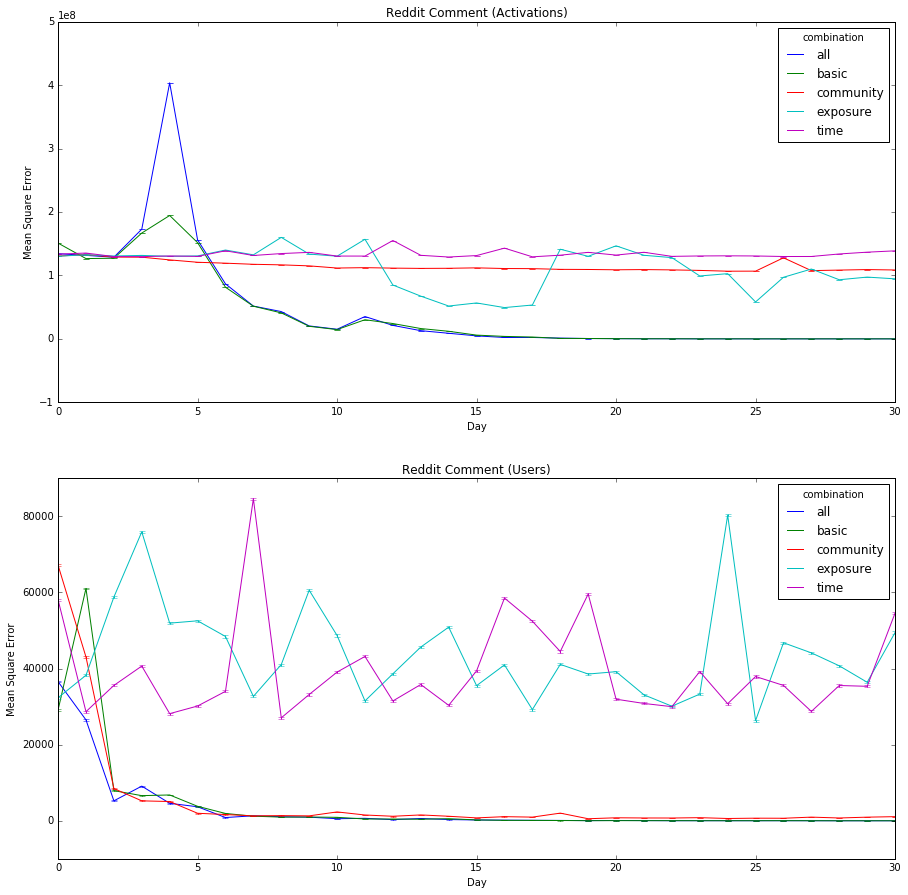

In [31]:
f, a = plt.subplots(2,1,figsize=(15,15))
ax = dft.T.xs('activation_target', axis=1).plot(ax=a[0], yerr=dft_error.T.xs('activation_target', axis=1))
ax.set_xlabel("Day")
ax.set_ylabel("Mean Square Error")
ax.set_title('Reddit Comment (Activations)')

ax = dft.T.xs('user_target', axis=1).plot(ax=a[1], yerr=dft_error.T.xs('user_target', axis=1))
ax.set_xlabel("Day")
ax.set_ylabel("Mean Square Error")
ax.set_title('Reddit Comment (Users)')


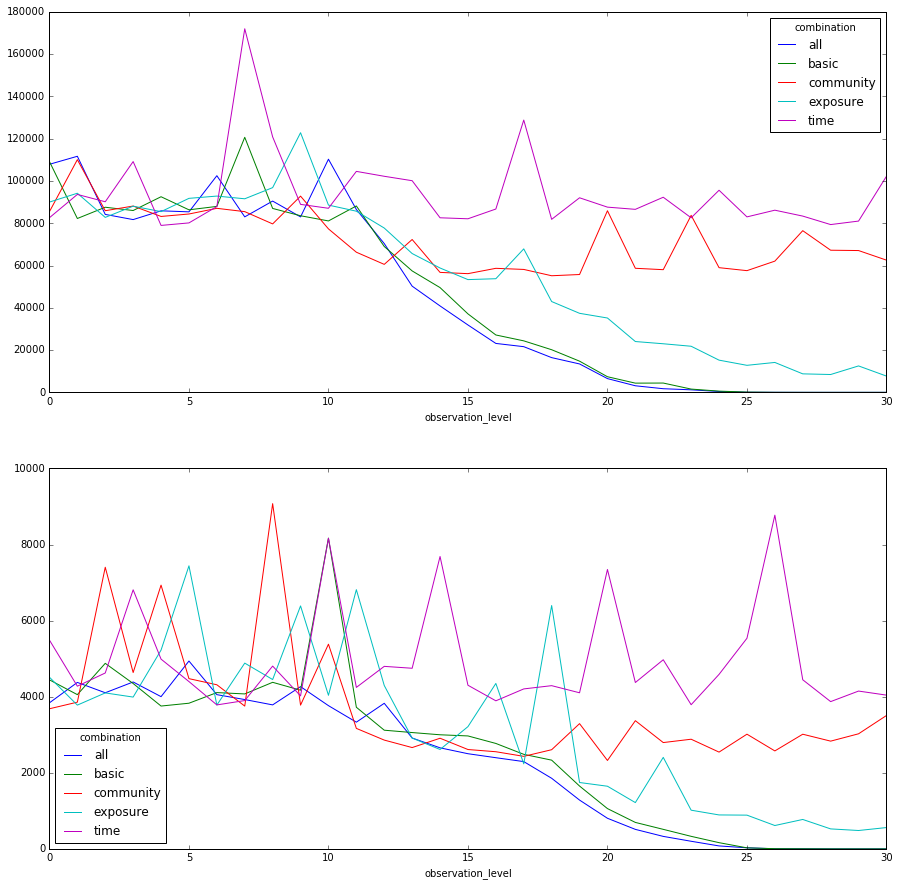

In [28]:
f, a = plt.subplots(2,1,figsize=(15,15))
dft.T.xs('activation_target', axis=1).plot(ax=a[0])
dft.T.xs('user_target', axis=1).plot(ax=a[1])

In [104]:
dft.T.xs('activation_target', axis=1)

combination,all,basic,community,exposure,time
observation_level,,,,,
0,1.323489e-23,1.323489e-23,0.000000e+00,0.000000e+00,0.000000e+00
1,5.169879e-26,5.169879e-26,5.169879e-26,5.169879e-26,5.169879e-26
2,3.308722e-24,1.323489e-23,3.308722e-24,1.323489e-23,1.323489e-23
3,3.308722e-24,3.308722e-24,0.000000e+00,0.000000e+00,3.308722e-24
4,0.000000e+00,1.323489e-23,1.323489e-23,0.000000e+00,1.323489e-23
5,0.000000e+00,3.231174e-27,0.000000e+00,3.231174e-27,0.000000e+00
6,1.292470e-26,3.231174e-27,0.000000e+00,0.000000e+00,1.292470e-26
7,0.000000e+00,0.000000e+00,1.292470e-26,1.292470e-26,0.000000e+00
8,0.000000e+00,3.231174e-27,5.169879e-26,0.000000e+00,1.292470e-26
